In [8]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey=HKHE3U0MF6OT06XT'
r = requests.get(url)
data = r.json()

print(data)

{'items': '0', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': []}


In [10]:
# Replace with your own API key
api_key = 'HKHE3U0MF6OT06XT'
base_url = 'https://www.alphavantage.co/query'

# Function to extract economy macro news for the past 3 years
def get_economy_macro_news(api_key):
    url = f'{base_url}?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey={api_key}'
    
    # Send request to Alpha Vantage API
    r = requests.get(url)
    data = r.json()
    
    # Print full API response for reference
    print("API Response:", data)
    
    # Extract the feed data
    news_data = data.get('feed', [])
    
    if not news_data:
        # If the feed is empty, create a DataFrame with metadata fields
        df = pd.DataFrame({
            'items': [data.get('items', 'N/A')],
            'sentiment_score_definition': [data.get('sentiment_score_definition', 'N/A')],
            'relevance_score_definition': [data.get('relevance_score_definition', 'N/A')]
        })
    else:
        # If there's data, create a DataFrame from the feed
        df = pd.DataFrame(news_data)

    return df

# Call the function and create the DataFrame
news_df = get_economy_macro_news(api_key)

# Print the DataFrame
print(news_df)


API Response: {'items': '0', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': []}
  items                         sentiment_score_definition  \
0     0  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   

                          relevance_score_definition  
0  0 < x <= 1, with a higher score indicating hig...  


In [11]:
# Function to extract economy macro news for multiple tickers
def get_economy_macro_news(api_key, tickers):
    url = f'{base_url}?function=NEWS_SENTIMENT&tickers=AAPL&topics=economy_macro&apikey={api_key}'
    
    # Send request to Alpha Vantage API
    r = requests.get(url)
    data = r.json()
    
    # Extract the feed data
    news_data = data.get('feed', [])
    
    if not news_data:
        # If the feed is empty, create a structured DataFrame with metadata
        structured_data = {
            'Metadata': ['Items', 'Sentiment Score Definition', 'Relevance Score Definition'],
            'Details': [
                data.get('items', 'N/A'),
                data.get('sentiment_score_definition', 'N/A'),
                data.get('relevance_score_definition', 'N/A')
            ]
        }
        df = pd.DataFrame(structured_data)
    else:
        # If there is data in the feed, create a DataFrame from the news data
        df = pd.DataFrame(news_data)
        
        # Select specific columns and add a 'ticker' column to differentiate stocks
        df = df[['title', 'summary', 'url', 'time_published', 'ticker']]

    return df

# List of multiple stocks you want to query
tickers = 'AAPL,GOOGL,AMZN'

# Call the function and create the DataFrame
news_df = get_economy_macro_news(api_key, tickers)

# Print the DataFrame in a structured table format
print(news_df)


                     Metadata  \
0                       Items   
1  Sentiment Score Definition   
2  Relevance Score Definition   

                                             Details  
0                                                  0  
1  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...  
2  0 < x <= 1, with a higher score indicating hig...  


In [12]:
ts = TimeSeries(api_key)
ti = TechIndicators(api_key)
# Get json object with the 30-min interval intraday data and another with  the call's metadata for January, 2014.
data, meta_data = ts.get_intraday('GOOGL', month='2014-01', interval='30min')
#Get json object with the 30-min interval simple moving average (SMA) values and another with  the call's metadata for January, 2014.
data, meta_data = ti.get_sma('GOOGL', month='2014-01', interval='30min')


In [13]:
from datetime import datetime, timedelta

# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily adjusted time series for 'full' dataset
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

# Print metadata to check if there are any restrictions or errors
print(meta_data)

# Check the full dataset length
print(f"Total data points retrieved: {len(data)}")

# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Calculate the date from 5 years ago
five_years_ago = datetime.now() - timedelta(days=5*365)

# Filter the data for the past 5 years
filtered_data = data[data.index >= five_years_ago]

# Check the length of the filtered data
print(f"Total data points after filtering for 5 years: {len(filtered_data)}")

# Display the first two rows of the filtered data

print(filtered_data.head(5))


{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2024-10-01', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}
Total data points retrieved: 6269
Total data points after filtering for 5 years: 1256
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-10-01  428.450  428.480  418.81    420.69  18853029.0
2024-09-30  428.210  430.420  425.37    430.30  16854606.0
2024-09-27  431.520  431.850  427.47    428.02  14896131.0
2024-09-26  435.085  435.300  429.13    431.31  14492044.0
2024-09-25  429.830  433.119  428.57    432.11  13396364.0


In [14]:
 # For the default date string index behavior
ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='date')
# For the default integer index behavior
ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='integer')

Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2016-07-29    56.39    57.25  55.3800     57.10  10239664.0
2016-07-28    56.19    56.60  56.0137     56.18   5547934.0
2016-07-27    57.12    57.22  55.7200     56.06  11166886.0
2016-07-26    56.17    56.92  56.0900     56.63  12862739.0
2016-07-25    55.00    55.81  54.7600     55.68   7813211.0


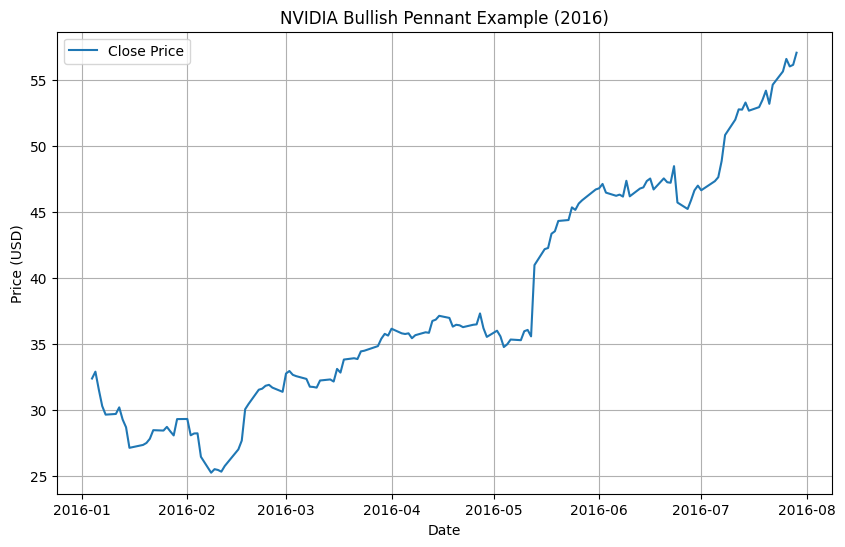

In [39]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='NVDA', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2016-01-01'
end_date = '2016-07-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('NVDIA_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('NVIDIA Bullish Pennant Example (2016)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


Available columns: Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-05-29   319.25   321.15  316.47    317.94  38399532.0
2020-05-28   316.77   323.44  315.63    318.25  33449103.0
2020-05-27   316.14   318.71  313.09    318.11  28236274.0
2020-05-26   323.50   324.24  316.50    316.73  31380454.0
2020-05-22   315.77   319.23  315.35    318.89  20450754.0


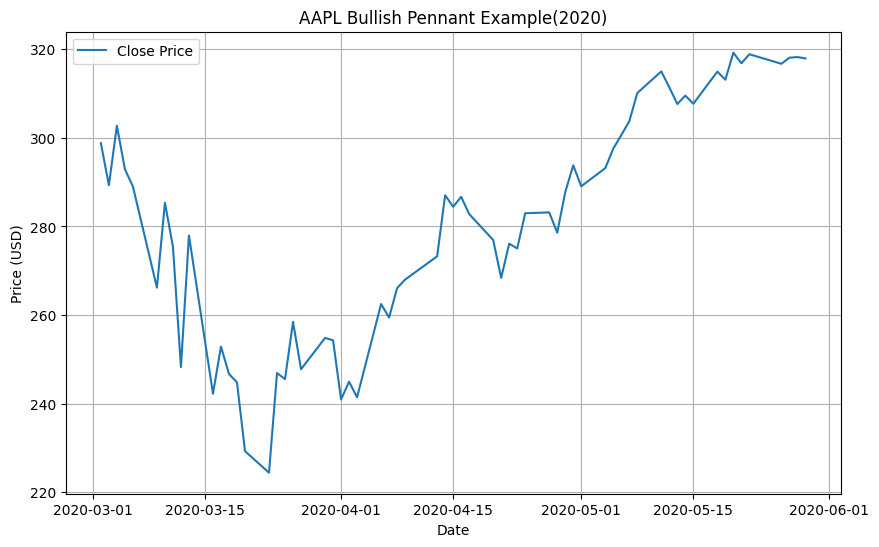

In [40]:
from datetime import datetime, timedelta
# Initialize the TimeSeries object with your API key
ts = TimeSeries(api_key, output_format='pandas')

# Retrieve the daily time series data for LEH (Lehman Brothers)
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Print column names to inspect them
print("Available columns:", data.columns)

# Convert the index to datetime for filtering
data.index = pd.to_datetime(data.index)

# Define the date range for 2007-2008
start_date = '2020-03-01'
end_date = '2020-05-31'

# Filter the data for the time period between 2007 and 2008
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Inspect the first few rows of the filtered data
print(filtered_data.head())

# Export as a csv file 
data.to_csv('AAPL_data.csv', index=True)

# Plot the 'close' price for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['4. close'], label='Close Price')
plt.title('AAPL Bullish Pennant Example(2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

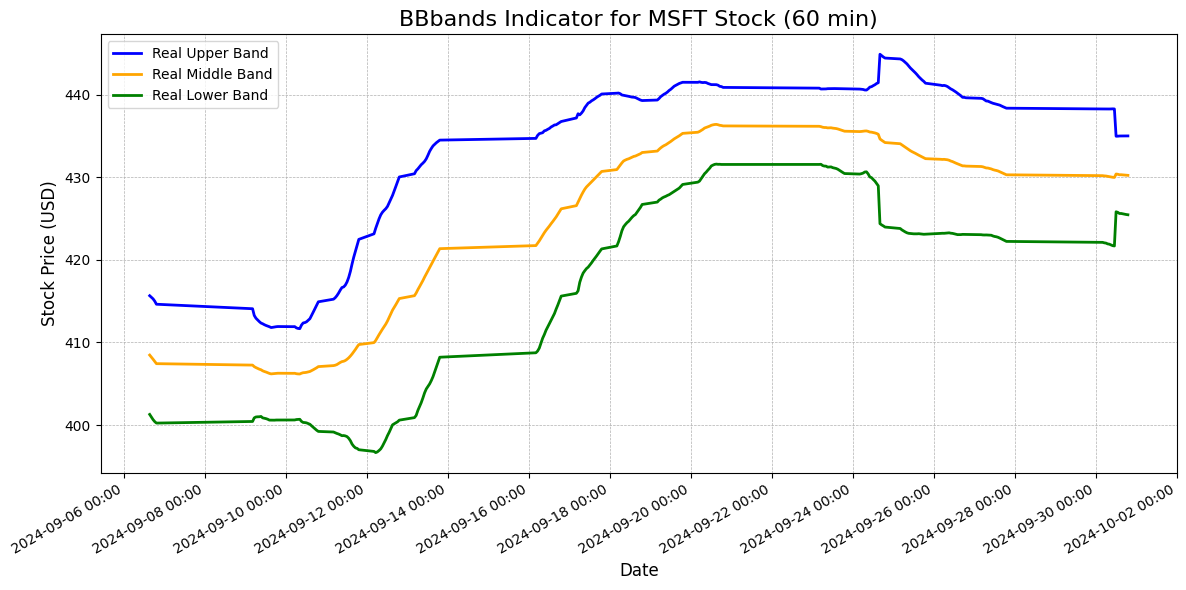

In [ ]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetching the data from Alpha Vantage
ti = TechIndicators(key='HKHE3U0MF6OT06XT', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)

# Create the figure and axis
plt.figure(figsize=(12, 6), dpi=100)

# Plot the Bollinger Bands with custom styles
plt.plot(data.index, data['Real Upper Band'], label='Real Upper Band', color='blue', linewidth=2)
plt.plot(data.index, data['Real Middle Band'], label='Real Middle Band', color='orange', linewidth=2)
plt.plot(data.index, data['Real Lower Band'], label='Real Lower Band', color='green', linewidth=2)

# Set the title and axis labels
plt.title('BBbands Indicator for MSFT Stock (60 min)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)

# Format the x-axis to display dates every other tick
locator = mdates.DayLocator(interval=2)  # Set interval to 2 for every other tick
plt.gca().xaxis.set_major_locator(locator)

# Format the x-axis to display the datetime in a readable format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add a grid for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend in the upper left corner
plt.legend(loc='upper left')

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
import requests
import json

# Set your API key
api_key = "HKHE3U0MF6OT06XT"

# URL to access real GDP data
url = f"https://www.alphavantage.co/query?function=REAL_GDP&apikey={api_key}"

# Make the request and get the response in JSON
response = requests.get(url)
data = response.json()

# Print the data to verify the response
print(json.dumps(data, indent=4))


{
    "name": "Real Gross Domestic Product",
    "interval": "annual",
    "unit": "billions of dollars",
    "data": [
        {
            "date": "2023-01-01",
            "value": "22671.096"
        },
        {
            "date": "2022-01-01",
            "value": "22034.828"
        },
        {
            "date": "2021-01-01",
            "value": "21494.798"
        },
        {
            "date": "2020-01-01",
            "value": "20267.585"
        },
        {
            "date": "2019-01-01",
            "value": "20715.671"
        },
        {
            "date": "2018-01-01",
            "value": "20193.896"
        },
        {
            "date": "2017-01-01",
            "value": "19612.102"
        },
        {
            "date": "2016-01-01",
            "value": "19141.672"
        },
        {
            "date": "2015-01-01",
            "value": "18799.622"
        },
        {
            "date": "2014-01-01",
            "value": "18261.714"
        },


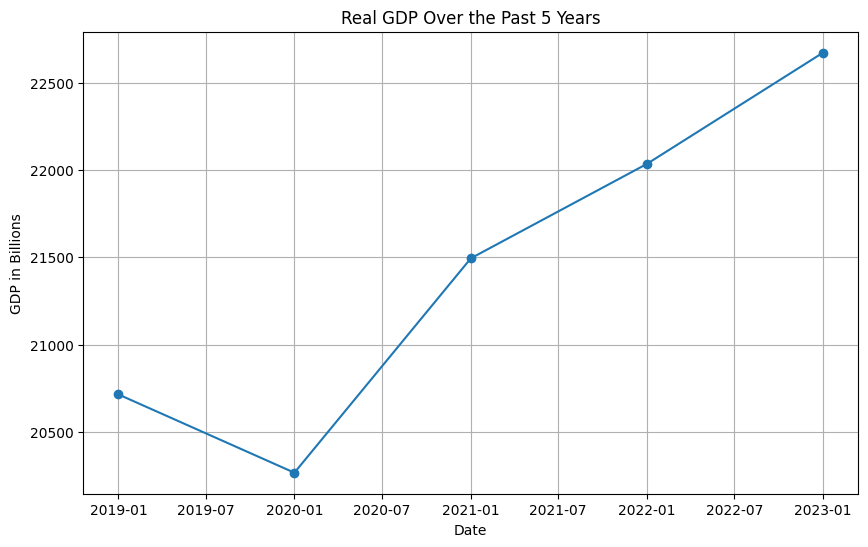

In [ ]:
import pandas as pd

# Convert the data into a pandas DataFrame
gdp_data = pd.DataFrame(data['data'])

# Convert the 'date' column to datetime format and 'value' to numeric
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'])

# Filter the data for the past five years
five_years_ago = datetime.now().year - 5
gdp_data_filtered = gdp_data[gdp_data['date'].dt.year >= five_years_ago]

# Plot the real GDP data
plt.figure(figsize=(10, 6))
plt.plot(gdp_data_filtered['date'], gdp_data_filtered['value'], marker='o')
plt.title('Real GDP Over the Past 5 Years')
plt.xlabel('Date')
plt.ylabel('GDP in Billions')
plt.grid(True)
plt.show()